In [3]:
# PLOTS THE NIRISS BACKGROUND MODELS FROM EACH PIPELINE
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

sys.path.append('./scripts')
from utils import load_plt_params, pipeline_dictionary

# set the matplotlib parameters
pltparams=load_plt_params()

COLOR = pltparams[pltparams['name']=='text.color']['value'][0]

color_dict = pipeline_dictionary()

plt.rcParams['font.size'] = 10

figsize = (7.20472, 7)

/var/folders/9s/jb487nv52hs8n0q5ftmb1lk80000gn/T/ipykernel_5625/2752861405.py:73: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/nature_submission/edfigure3.jpg',


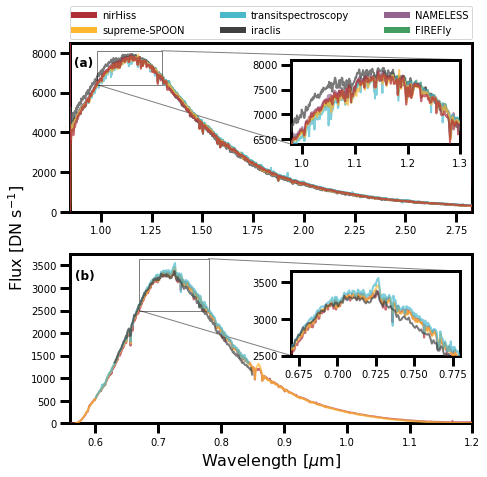

In [8]:
path = './data/stellar_spectra'
nirhiss = np.load(os.path.join(path, 'nirhiss_spectra.npy'))
spoon = np.load(os.path.join(path, 'supremespoon_spectra.npy'))
ts = np.load(os.path.join(path, 'transitspectroscopy_spectra.npy'),
             allow_pickle=True)
iraclis  = np.load(os.path.join(path, 'iraclis_spectra.npy'), allow_pickle=True)
nameless = np.load(os.path.join(path, 'nameless_spectra.npy'), allow_pickle=True)
firefly = np.load(os.path.join(path, 'firefly_spectra.npy'), allow_pickle=True)


fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(7.20472, 7))
fig.set_facecolor('w')

axins1 = ax1.inset_axes([0.55, 0.4, 0.42, 0.5])
axins2 = ax2.inset_axes([0.55, 0.4, 0.42, 0.5])

kwargs={'linewidth':2, 'alpha':0.7}
labels = ['nirHiss', 'supreme-SPOON', 'transitspectroscopy', 'iraclis',
          'NAMELESS', 'FIREFly']
initials = ['ADF', 'MCR', 'NE', 'AT', 'LPC', 'ZR']
scaling1 = [1, 72, 1.065, 1.15, 1.07, 1.04]
scaling2 = [1, 72, 1.09, 2.55, 1.09, 1]
zorder = np.flip(np.arange(0,7,1))

for ax in [ax1, axins1]:
    for i, data in enumerate([nirhiss, spoon, ts, iraclis, nameless, firefly]):
        ax.plot(data[0], data[1]/scaling1[i],
                color=color_dict[initials[i]]['color'],
                zorder=zorder[i],
                **kwargs)
        ax.plot(data[0], data[1]*1000,
                color=color_dict[initials[i]]['color'],
                zorder=zorder[i],
                label=labels[i])

for ax in [ax2, axins2]:
    for i, data in enumerate([nirhiss, spoon, ts, iraclis]):
        ax.plot(data[2], data[3]/scaling2[i],
                color=color_dict[initials[i]]['color'],
                zorder=100,
                label=labels[i], **kwargs)


ax1.set_xlim(0.85,2.83)
ax1.set_ylim(0,8500)

axins1.set_xlim(0.98, 1.3)
axins1.set_ylim(6400,8100)

ax2.set_xlim(0.56,1.2)
ax2.set_ylim(0,3750)

axins2.set_xlim(0.67, 0.78)
axins2.set_ylim(2500,3650)

ax1.indicate_inset_zoom(axins1, edgecolor=COLOR)
ax2.indicate_inset_zoom(axins2, edgecolor=COLOR)

ax2.set_xlabel('Wavelength [$\mu$m]', fontsize=16)
ax2.set_ylabel('Flux [DN s$^{-1}$]', fontsize=16, y=1.1)

ax1.text(s='(a)', x=0.87, y=7300, fontweight='bold', fontsize=12)
ax2.text(s='(b)', x=0.567, y=3200, fontweight='bold', fontsize=12)

leg = ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
                 ncol=3, mode="expand", borderaxespad=0.,
                 fontsize=10)

for legobj in leg.legendHandles:
    legobj.set_linewidth(6.0)

plt.subplots_adjust(hspace=0.25)
plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/nature_submission/edfigure3.jpg', 
            rasterize=True, bbox_inches='tight', dpi=300)
